Technique 1: Mutation - bitflip_mutation, Crossover - one_point_crossover, Parent Selection - roulette_wheel_selection, Survivor Selection - copy_population
Run: 1, Generation: 1, Best Fitness: 102.17010134618096
Run: 1, Generation: 2, Best Fitness: 133.15006227844228
Run: 1, Generation: 3, Best Fitness: 110.57135785205783
Run: 1, Generation: 4, Best Fitness: 104.36763133840495
Run: 1, Generation: 5, Best Fitness: 136.12265484760968
Run: 1, Generation: 6, Best Fitness: 131.4542997899
Run: 1, Generation: 7, Best Fitness: 143.3951389274565
Run: 1, Generation: 8, Best Fitness: 156.4018886029348
Run: 1, Generation: 9, Best Fitness: 154.3066278874479
Run: 1, Generation: 10, Best Fitness: 154.57377816033426
Run: 1, Generation: 11, Best Fitness: 162.67558134536324
Run: 1, Generation: 12, Best Fitness: 142.44606595518187
Run: 1, Generation: 13, Best Fitness: 167.5618632966919
Run: 1, Generation: 14, Best Fitness: 194.27920637869704
Run: 1, Generation: 15, Best Fitness: 194.16329159819028
Run: 

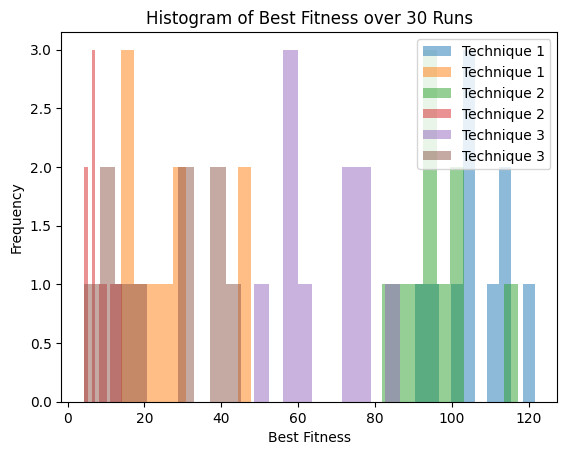

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    @staticmethod
    def one_point_crossover(parents):
        crossover_point = np.random.randint(1, parents.shape[1])
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_point] = parents[parent1_idx, :crossover_point]
            offspring[i, crossover_point:] = parents[parent2_idx, crossover_point:]

        return offspring

    @staticmethod
    def two_point_crossover(parents):
        crossover_points = sorted(np.random.choice(parents.shape[1], 2, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_points[0]] = parents[parent1_idx, :crossover_points[0]]
            offspring[i, crossover_points[0]:crossover_points[1]] = parents[parent2_idx, crossover_points[0]:crossover_points[1]]
            offspring[i, crossover_points[1]:] = parents[parent1_idx, crossover_points[1]:]

        return offspring

    def n_point_crossover(self, parents, n=2):
        crossover_points = np.sort(np.random.choice(self.dimensions - 1, n, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            for j in range(n):
                if j % 2 == 0:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else self.dimensions
                    offspring[i, start:end] = parents[i % 2, start:end]
                else:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else self.dimensions
                    offspring[i, start:end] = parents[(i + 1) % 2, start:end]

        return offspring

    def uniform_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.uniform(low=-0.1, high=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def gaussian_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.normal(loc=0, scale=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def bitflip_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        offspring[mask] = 1 - offspring[mask]
        return offspring

    def roulette_wheel_selection(self, population, fitness):
        probabilities = fitness / np.sum(fitness)
        selected_indices = np.random.choice(len(fitness), size=len(fitness), p=probabilities)
        return population[selected_indices], selected_indices

    def tournament_selection(self, population, fitness, tournament_size=2):
        selected_indices = []
        for _ in range(len(fitness)):
            tournament_indices = np.random.choice(len(fitness), size=tournament_size, replace=False)
            tournament_fitness = fitness[tournament_indices]
            selected_indices.append(tournament_indices[np.argmin(tournament_fitness)])
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method, survivor_selection_method, run):
        population = self.initialize_population()
        best_fitnesses = []
        selected_indices_history = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, selected_indices = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            population = survivor_selection_method(population, offspring_mutation, fitness)
            selected_indices_history.append(selected_indices)

            # Print only run number and best fitness
            print(f"Run: {run+1}, Generation: {generation + 1}, Best Fitness: {best_fitness}")

        return best_fitnesses, selected_indices_history

def copy_population(population, offspring, fitness):
    return np.copy(offspring)

if __name__ == "__main__":
    pop_size = 100
    dimensions = 10
    min_val = -5.12
    max_val = 5.12
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.8
    num_runs = 10

    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_methods = [ga.bitflip_mutation, ga.gaussian_mutation, ga.uniform_mutation]
    crossover_methods = [ga.one_point_crossover, ga.two_point_crossover, ga.n_point_crossover]
    parent_selection_methods = [ga.roulette_wheel_selection, ga.tournament_selection]
    survivor_selection_methods = [copy_population, copy_population]

    global_min_fitness = float('inf')
    best_solution = None

    results = []

    for idx, (mutation_method, crossover_method) in enumerate(zip(mutation_methods, crossover_methods)):
        for parent_selection_method, survivor_selection_method in zip(parent_selection_methods, survivor_selection_methods):
            print(f"Technique {idx+1}: Mutation - {mutation_method.__name__}, Crossover - {crossover_method.__name__}, Parent Selection - {parent_selection_method.__name__}, Survivor Selection - {survivor_selection_method.__name__}")
            best_fitnesses_list = []
            best_solutions = []
            for run in range(num_runs):
                best_fitnesses, _ = ga.evolve(mutation_method, crossover_method, parent_selection_method, survivor_selection_method, run)
                best_fitness = min(best_fitnesses)
                best_fitnesses_list.append(best_fitness)
                if best_fitness < global_min_fitness:
                    global_min_fitness = best_fitness
                    best_solution = ga.initialize_population()[np.argmin(best_fitnesses)]
                print(f"Run: {run+1}, Best Fitness: {best_fitness}")
            print(f"Best Solution: {best_solution}, Best Fitness Overall: {global_min_fitness}")
            results.append((f"Technique {idx+1}", best_fitnesses_list))

    for technique, result in results:
        plt.hist(result, bins=10, alpha=0.5, label=technique)

    plt.xlabel('Best Fitness')
    plt.ylabel('Frequency')
    plt.title('Histogram of Best Fitness over 30 Runs')
    plt.legend()
    plt.show()
